In [54]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, PassiveAggressiveRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, 
    BaggingRegressor
)
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error


#custom import
from regression import *
from regression_visualize import * 
from Preprocessing import *




In [55]:
data = pd.read_csv("E:\ZeroCodeML\House-Price-Prediction-clean.csv")
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\Z'
<>:1: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\Yeswanth SURESH\AppData\Local\Temp\ipykernel_12752\89619955.py:1: SyntaxWarning: invalid escape sequence '\Z'
  data = pd.read_csv("E:\ZeroCodeML\House-Price-Prediction-clean.csv")


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [56]:
data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [57]:
summary = df_summary(data)
print(summary)

           Column dtypes  Missing (%)  Uniques (%)
0              Id  int64          0.0   100.000000
1      MSSubClass  int64          0.0     1.027397
2         LotArea  int64          0.0    73.493151
3     OverallQual  int64          0.0     0.684932
4     OverallCond  int64          0.0     0.616438
5       YearBuilt  int64          0.0     7.671233
6    YearRemodAdd  int64          0.0     4.178082
7      BsmtFinSF1  int64          0.0    43.630137
8       BsmtUnfSF  int64          0.0    53.424658
9     TotalBsmtSF  int64          0.0    49.383562
10       1stFlrSF  int64          0.0    51.575342
11       2ndFlrSF  int64          0.0    28.561644
12      GrLivArea  int64          0.0    58.972603
13   BsmtFullBath  int64          0.0     0.273973
14       FullBath  int64          0.0     0.273973
15       HalfBath  int64          0.0     0.205479
16   BedroomAbvGr  int64          0.0     0.547945
17   KitchenAbvGr  int64          0.0     0.273973
18   TotRmsAbvGrd  int64       

In [58]:
df, encoder, scaler, dropped_columns = preprocess_data(data, 40)

In [59]:
target_column = "SalePrice"
X_train, X_test, y_train, y_test = split_data_supervised(df, target_column, split_ratio=70)

In [60]:
summary = df_summary(df)
print(summary)

           Column   dtypes  Missing (%)  Uniques (%)
0              Id  float64          0.0   100.000000
1      MSSubClass  float64          0.0     1.027397
2         LotArea  float64          0.0    73.493151
3     OverallQual  float64          0.0     0.684932
4     OverallCond  float64          0.0     0.616438
5       YearBuilt  float64          0.0     7.671233
6    YearRemodAdd  float64          0.0     4.178082
7      BsmtFinSF1  float64          0.0    43.630137
8       BsmtUnfSF  float64          0.0    53.424658
9     TotalBsmtSF  float64          0.0    49.383562
10       1stFlrSF  float64          0.0    51.575342
11       2ndFlrSF  float64          0.0    28.561644
12      GrLivArea  float64          0.0    58.972603
13   BsmtFullBath  float64          0.0     0.273973
14       FullBath  float64          0.0     0.273973
15       HalfBath  float64          0.0     0.205479
16   BedroomAbvGr  float64          0.0     0.547945
17   KitchenAbvGr  float64          0.0     0.

In [61]:
model_name = "linear_regression"
model, metrics,y_pred = train_regression_model(model_name, X_train, X_test, y_train, y_test)

In [62]:
print(y_test, y_pred)

606    -0.364177
1210    0.101729
492    -0.102451
410    -1.522644
396    -0.729346
          ...   
704     0.403937
513    -0.590833
674    -0.515281
1449   -1.119699
1282   -0.383065
Name: SalePrice, Length: 438, dtype: float64 [-2.28942102e-01  5.27388275e-01  1.42509059e-01 -9.58937618e-01
 -4.75505026e-01  1.19871870e+00 -1.04132376e-01 -7.58615913e-01
 -4.14876742e-01 -7.61258321e-01  6.49758125e-01 -4.15991978e-01
 -7.85891918e-01  3.88469713e-01  4.33292167e-01  8.94521180e-02
  7.43684517e-01 -3.74089099e-01 -5.46613674e-01 -1.06549790e-02
  1.87414786e-01 -3.86734878e-01 -1.14365408e+00  8.37815597e-01
  1.65812918e+00 -3.30604097e-01 -8.30800025e-01  1.70732871e-01
  6.98330054e-01 -5.44116778e-01  4.03249921e-01  3.76495081e-01
  1.30211624e+00  1.03525403e+00  4.70354181e-02  1.31977810e+00
 -4.14345530e-01 -4.57684767e-01  1.39945288e+00  3.98427016e-01
 -7.85649406e-01  6.38394832e-02 -1.42911152e-01 -4.10335325e-01
  1.03070074e+00  8.30735517e-01  2.48868880e-01  1.8

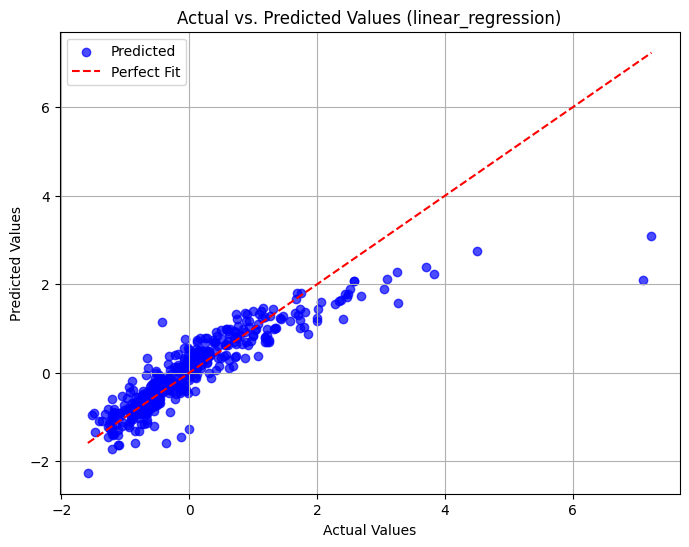

In [63]:
plot_actual_vs_predicted(y_test, y_pred, model_name)

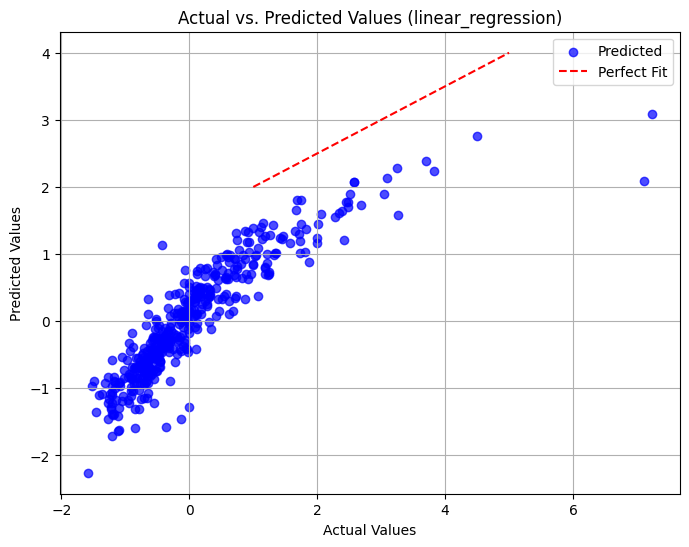

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predicted")
plt.plot([1, 5], [2, 4], '--r', label="Perfect Fit")  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values ({model_name})")
plt.legend()
plt.grid()
plt.show()

In [65]:
type(y_test)

pandas.core.series.Series

In [ ]:
x


print(freq)
print(bin)    
# print(counts)
# print(bin_edges)
# bin_edges
# histogram_data = [{"value": int(counts[i]), "bin": float(bin_edges[i])} for i in range(len(counts))]
# print(histogram_data)

[1, 0, 1, 4, 24, 74, 127, 101, 49, 28, 14, 4, 4, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[-1.5685843375404536, -1.349153029317975, -1.1297217210954962, -0.9102904128730175, -0.6908591046505388, -0.47142779642806, -0.2519964882055814, -0.03256517998310282, 0.18686612823937598, 0.4062974364618548, 0.6257287446843336, 0.845160052906812, 1.0645913611292908, 1.2840226693517696, 1.503453977574248, 1.7228852857967267, 1.9423165940192055, 2.161747902241684, 2.381179210464163, 2.6006105186866417, 2.8200418269091205, 3.0394731351315984, 3.2589044433540773, 3.478335751576556, 3.697767059799035, 3.9171983680215137, 4.1366296762439925, 4.356060984466471, 4.575492292688949, 4.794923600911428]


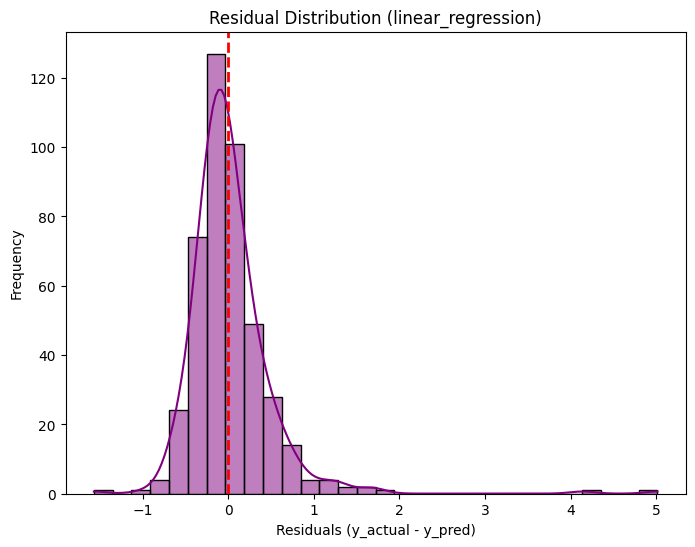

In [67]:
plot_residuals(y_test, y_pred, model_name)

In [68]:
plot_feature_importance(model, X_train)

Feature importance not available for this model.
